In [1]:
import numpy as np
import pandas as pd
from deap import algorithms
import multiprocessing

from preprocessing import preprocess_data
from ga_setup import setup_ga
from strategy_visualizer import print_strategy, plot_strategy, simulate_strategy, simulate_best_possible_strategy, plot_fitness_over_generations

In [2]:
stock_data, ta_features, _ = preprocess_data("./data/wig_d.csv")
ta_features

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,...,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_cr
365,0.006009,0.094874,0.941641,0.800880,0.820727,0.901769,0.615958,0.136714,0.459783,0.341002,...,0.714163,0.847761,0.883304,0.550882,0.754635,0.800912,0.454282,0.095323,0.723399,0.217329
366,0.010085,0.067148,0.908381,0.790832,0.819671,0.900598,0.613798,0.138438,0.493822,0.341002,...,0.714442,0.843452,0.880940,0.545478,0.774311,0.824712,0.455591,0.095391,0.682926,0.216556
367,0.030662,0.093509,0.968945,0.836003,0.821472,0.900718,0.652594,0.140952,0.516197,0.369727,...,0.733597,0.845106,0.879435,0.552450,0.775482,0.844046,0.431166,0.095770,0.740789,0.231158
368,0.021698,0.128281,0.921666,0.831179,0.821483,0.899950,0.658175,0.144114,0.555109,0.369727,...,0.682954,0.845887,0.878413,0.556376,0.820520,0.870848,0.472013,0.096149,0.691829,0.232766
369,0.014627,0.103969,0.872146,0.805248,0.817366,0.900179,0.647337,0.146147,0.526596,0.360938,...,0.685832,0.843416,0.877019,0.553355,0.788863,0.884323,0.399113,0.096263,0.669190,0.228294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,0.976102,0.938315,0.783798,0.993424,0.871783,0.991989,0.811603,0.312019,0.649625,0.412539,...,0.921568,0.966601,0.937050,0.723119,0.714089,0.754736,0.447659,0.349639,0.825358,0.471939
2279,0.981290,0.923087,0.820142,0.955853,0.829428,0.982671,0.809756,0.323694,0.666461,0.410112,...,0.931230,0.984643,0.956861,0.725604,0.695299,0.767887,0.397341,0.371642,0.681307,0.470523
2280,0.981810,0.906549,0.779111,0.914818,0.819299,0.980124,0.802191,0.335261,0.582716,0.410112,...,0.931895,0.993649,0.974810,0.710479,0.690118,0.777104,0.375822,0.379975,0.668755,0.465184
2281,0.994691,0.928762,0.837785,0.910447,0.817958,0.979381,0.814606,0.347676,0.654219,0.410112,...,0.915056,1.000000,0.990651,0.693349,0.733067,0.795286,0.424862,0.388276,0.706705,0.471686


In [3]:
# Genetic algorithm parameters:
POPULATION_SIZE = 10
N_GENERATIONS = 1000
TOURNAMENT_SIZE_POPULATION_RATIO = 0.1
CROSSOVER_PROBABILITY = 0.5
MUTATION_PROBABILITY = 0.2

# Simulation parameters:
INITIAL_MONEY = 1000
# COMMISSION = 0.0001 # 0.01%
COMMISSION = 0

In [4]:
population, toolbox, stats, hall_of_fame = setup_ga(
    stock_data,
    ta_features,
    POPULATION_SIZE,
    TOURNAMENT_SIZE_POPULATION_RATIO,
    INITIAL_MONEY,
    COMMISSION,
)
pool = multiprocessing.Pool()
toolbox.register("map", pool.map)

In [5]:
final_population, logbook = algorithms.eaSimple(
    population,
    toolbox,
    ngen=N_GENERATIONS,
    cxpb=CROSSOVER_PROBABILITY,
    mutpb=MUTATION_PROBABILITY,
    stats=stats,
    halloffame=hall_of_fame,
    verbose=True,
)

gen	nevals	avg            	std           	min           	max            
0  	100   	[1088.11118133]	[203.16827419]	[584.66828009]	[1727.81422728]
1  	59    	[1290.45330913]	[236.53589213]	[769.95635547]	[1764.59352762]
2  	66    	[1469.10672311]	[285.97585002]	[854.22106265]	[1950.32155748]
3  	67    	[1604.42543328]	[313.35691085]	[632.68487841]	[2625.54537618]
4  	51    	[1834.47775021]	[348.99440262]	[1015.20506064]	[2625.54537618]
5  	46    	[2105.14398537]	[419.42010452]	[1137.42221439]	[2625.54537618]
6  	52    	[2487.76016145]	[289.74676861]	[1422.06825413]	[2625.54537618]
7  	62    	[2484.25967362]	[335.79881546]	[1174.59025524]	[2625.54537618]
8  	60    	[2439.2085824] 	[395.37237877]	[1121.7096795] 	[2625.54537618]
9  	67    	[2476.84328531]	[310.78966331]	[1310.89810521]	[2625.54537618]
10 	52    	[2542.5657101] 	[250.26028398]	[1474.72112223]	[2672.11784417]
11 	63    	[2472.79995959]	[348.83955895]	[1289.19629393]	[2676.0221857] 
12 	67    	[2501.74702286]	[346.18577659]	[

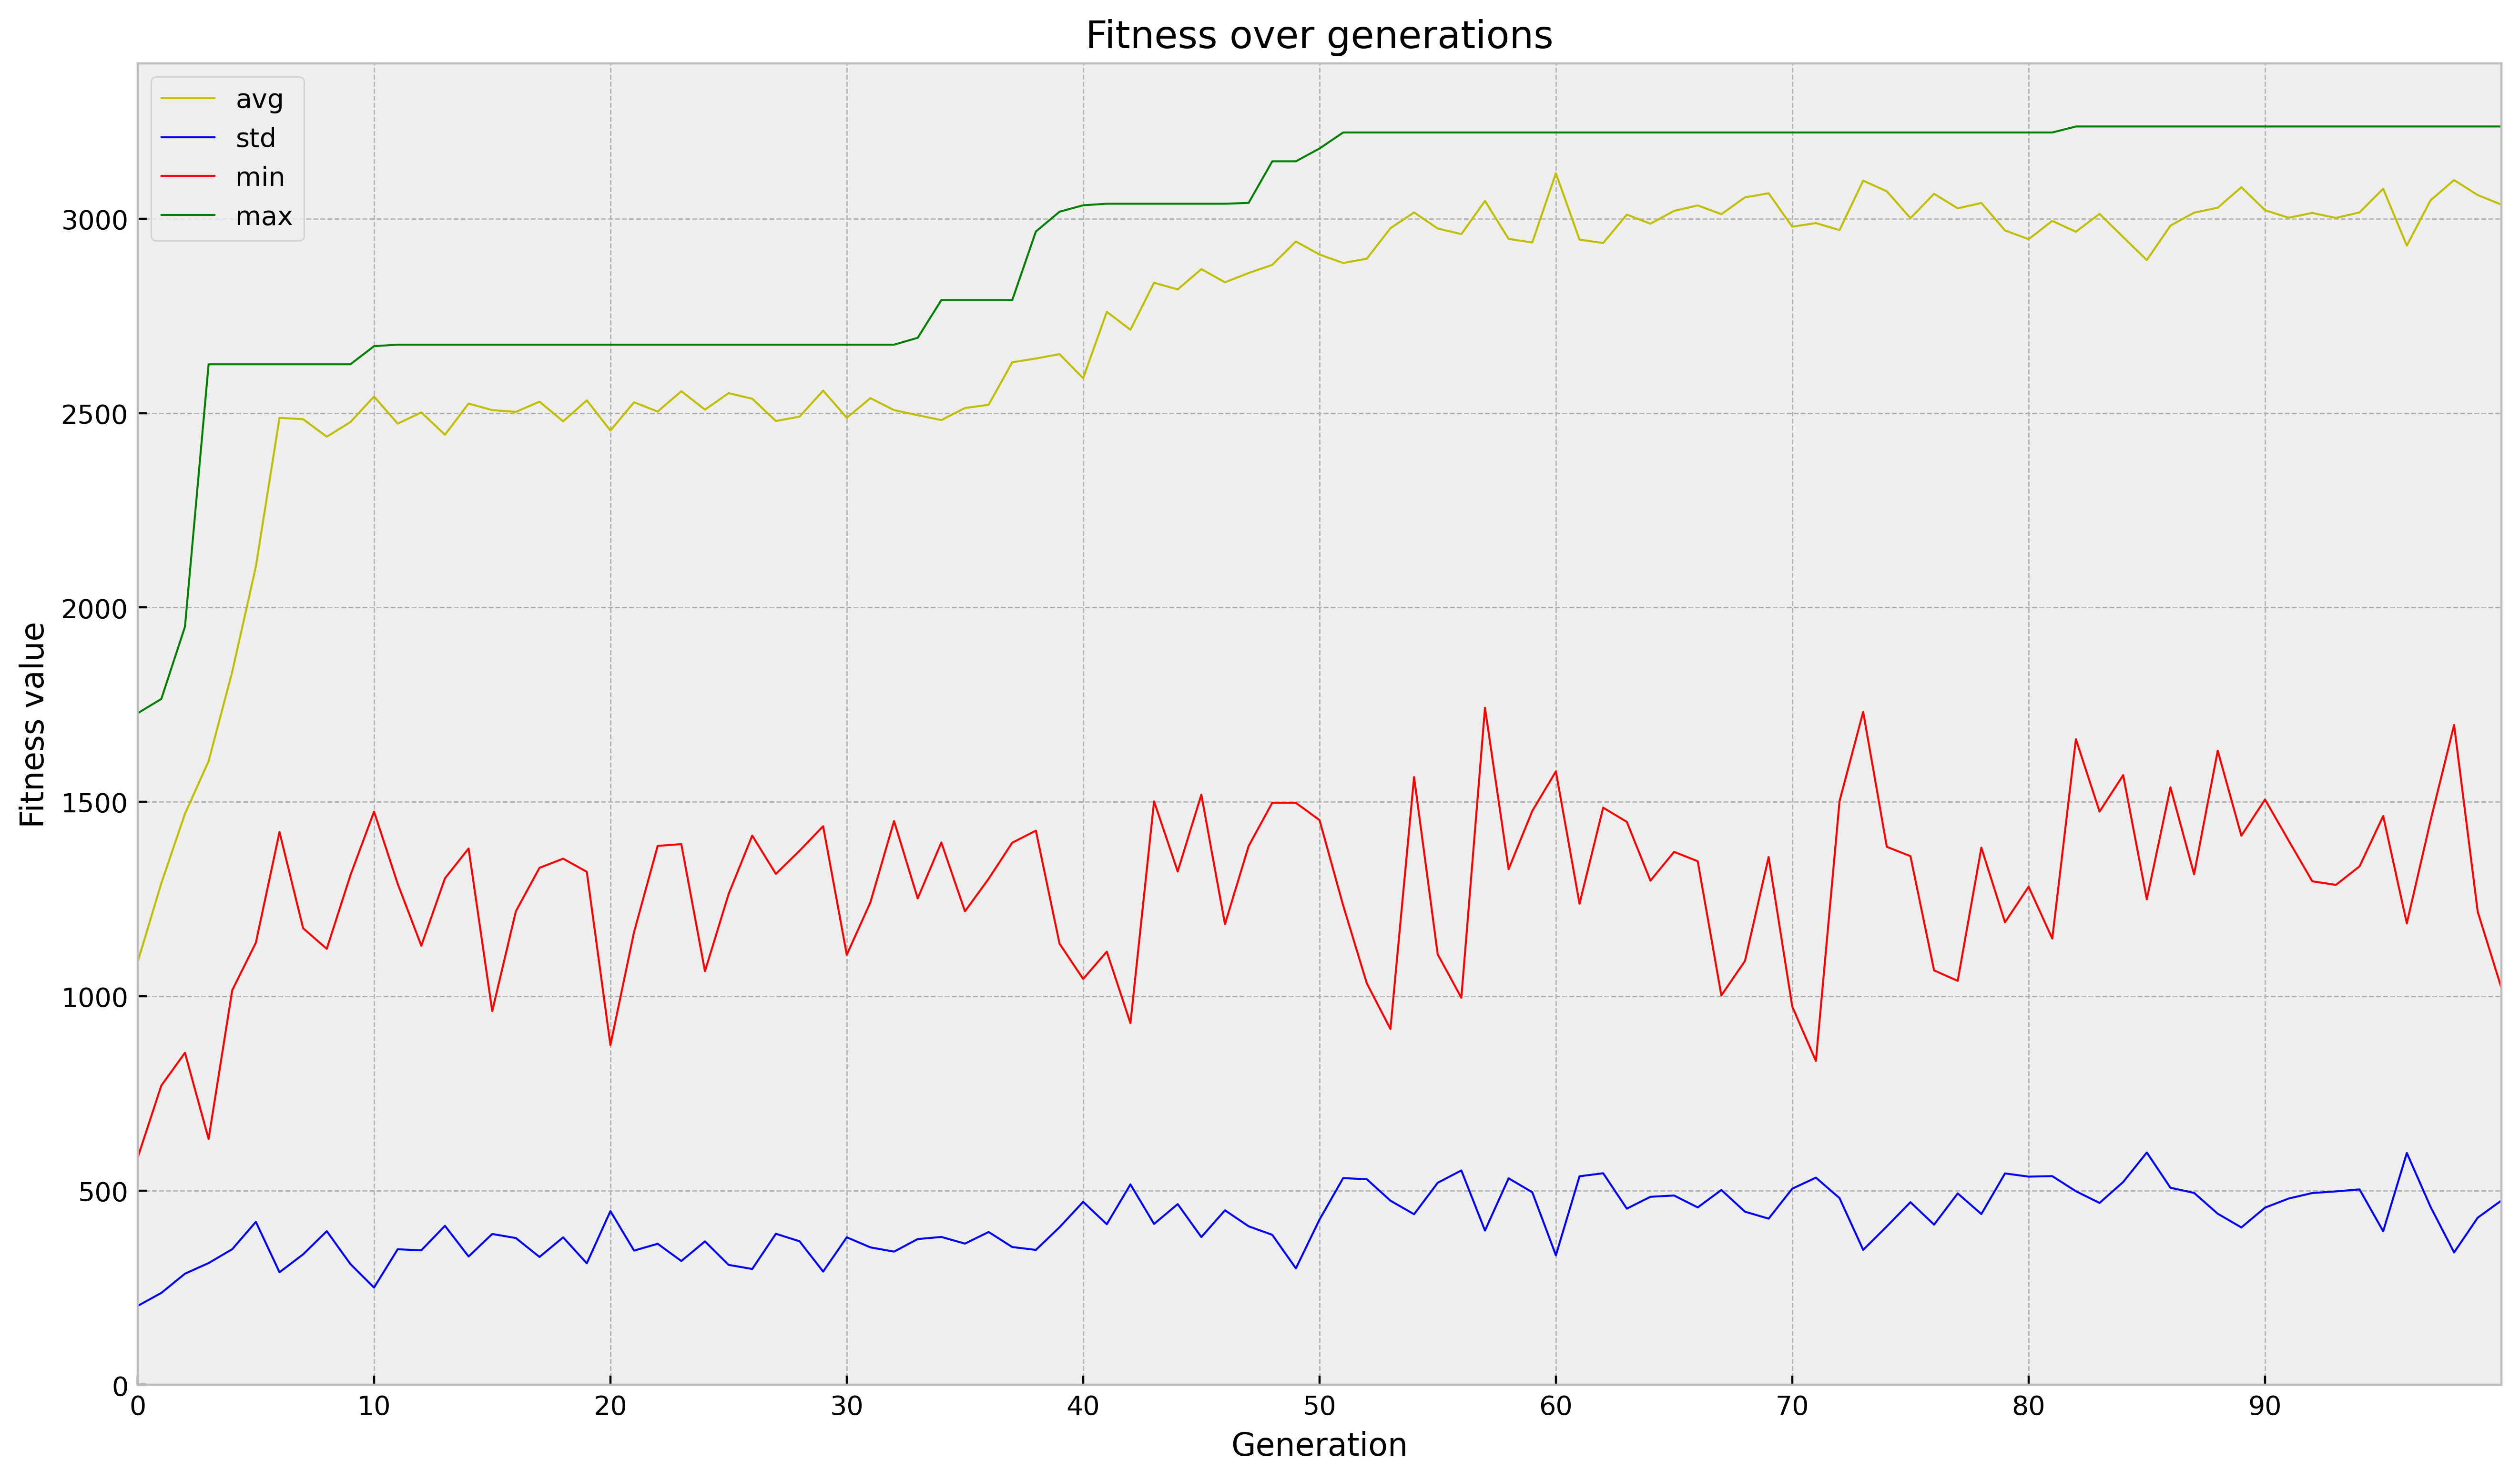

In [6]:
plot_fitness_over_generations(logbook)

In [7]:
best_strategy = hall_of_fame[0]
buy_strategy, sell_strategy = np.array_split(best_strategy, 2)
pd.DataFrame(
    zip(ta_features.columns, buy_strategy, sell_strategy),
    columns=["feature", "buy strategy weight", "sell strategy weight"],
)

,feature,buy strategy weight,sell strategy weight
0,volume_adi,-0.238876,-0.239382
1,volume_obv,-0.685322,0.513735
2,volume_cmf,-0.992010,-0.554993
3,volume_fi,0.577053,-0.732373
4,volume_em,0.589818,0.601876
...,...,...,...
72,momentum_pvo_signal,0.313317,0.928715
73,momentum_pvo_hist,0.611253,0.341553
74,momentum_kama,-0.310698,0.979652
75,others_dr,0.106641,-0.813973


In [8]:
print_strategy(stock_data, ta_features, best_strategy, INITIAL_MONEY, COMMISSION)

      DATE:   2012-09-28        ACTION:          buy          OPEN:     43817.67         MONEY:            0        SHARES:  0.022821843
      DATE:   2012-10-22        ACTION:         sell          OPEN:      43810.2         MONEY:  999.8295208        SHARES:            0
      DATE:   2012-10-23        ACTION:          buy          OPEN:     43738.39         MONEY:            0        SHARES:  0.022859312
      DATE:   2012-10-25        ACTION:         sell          OPEN:     43379.85         MONEY:  991.6335429        SHARES:            0
      DATE:   2012-10-26        ACTION:          buy          OPEN:     43164.58         MONEY:            0        SHARES:  0.022973316
      DATE:   2012-10-30        ACTION:         sell          OPEN:     43173.32         MONEY:  991.8343297        SHARES:            0
      DATE:   2012-10-31        ACTION:          buy          OPEN:     43261.65         MONEY:            0        SHARES:  0.022926410
      DATE:   2012-12-10        ACTION:  

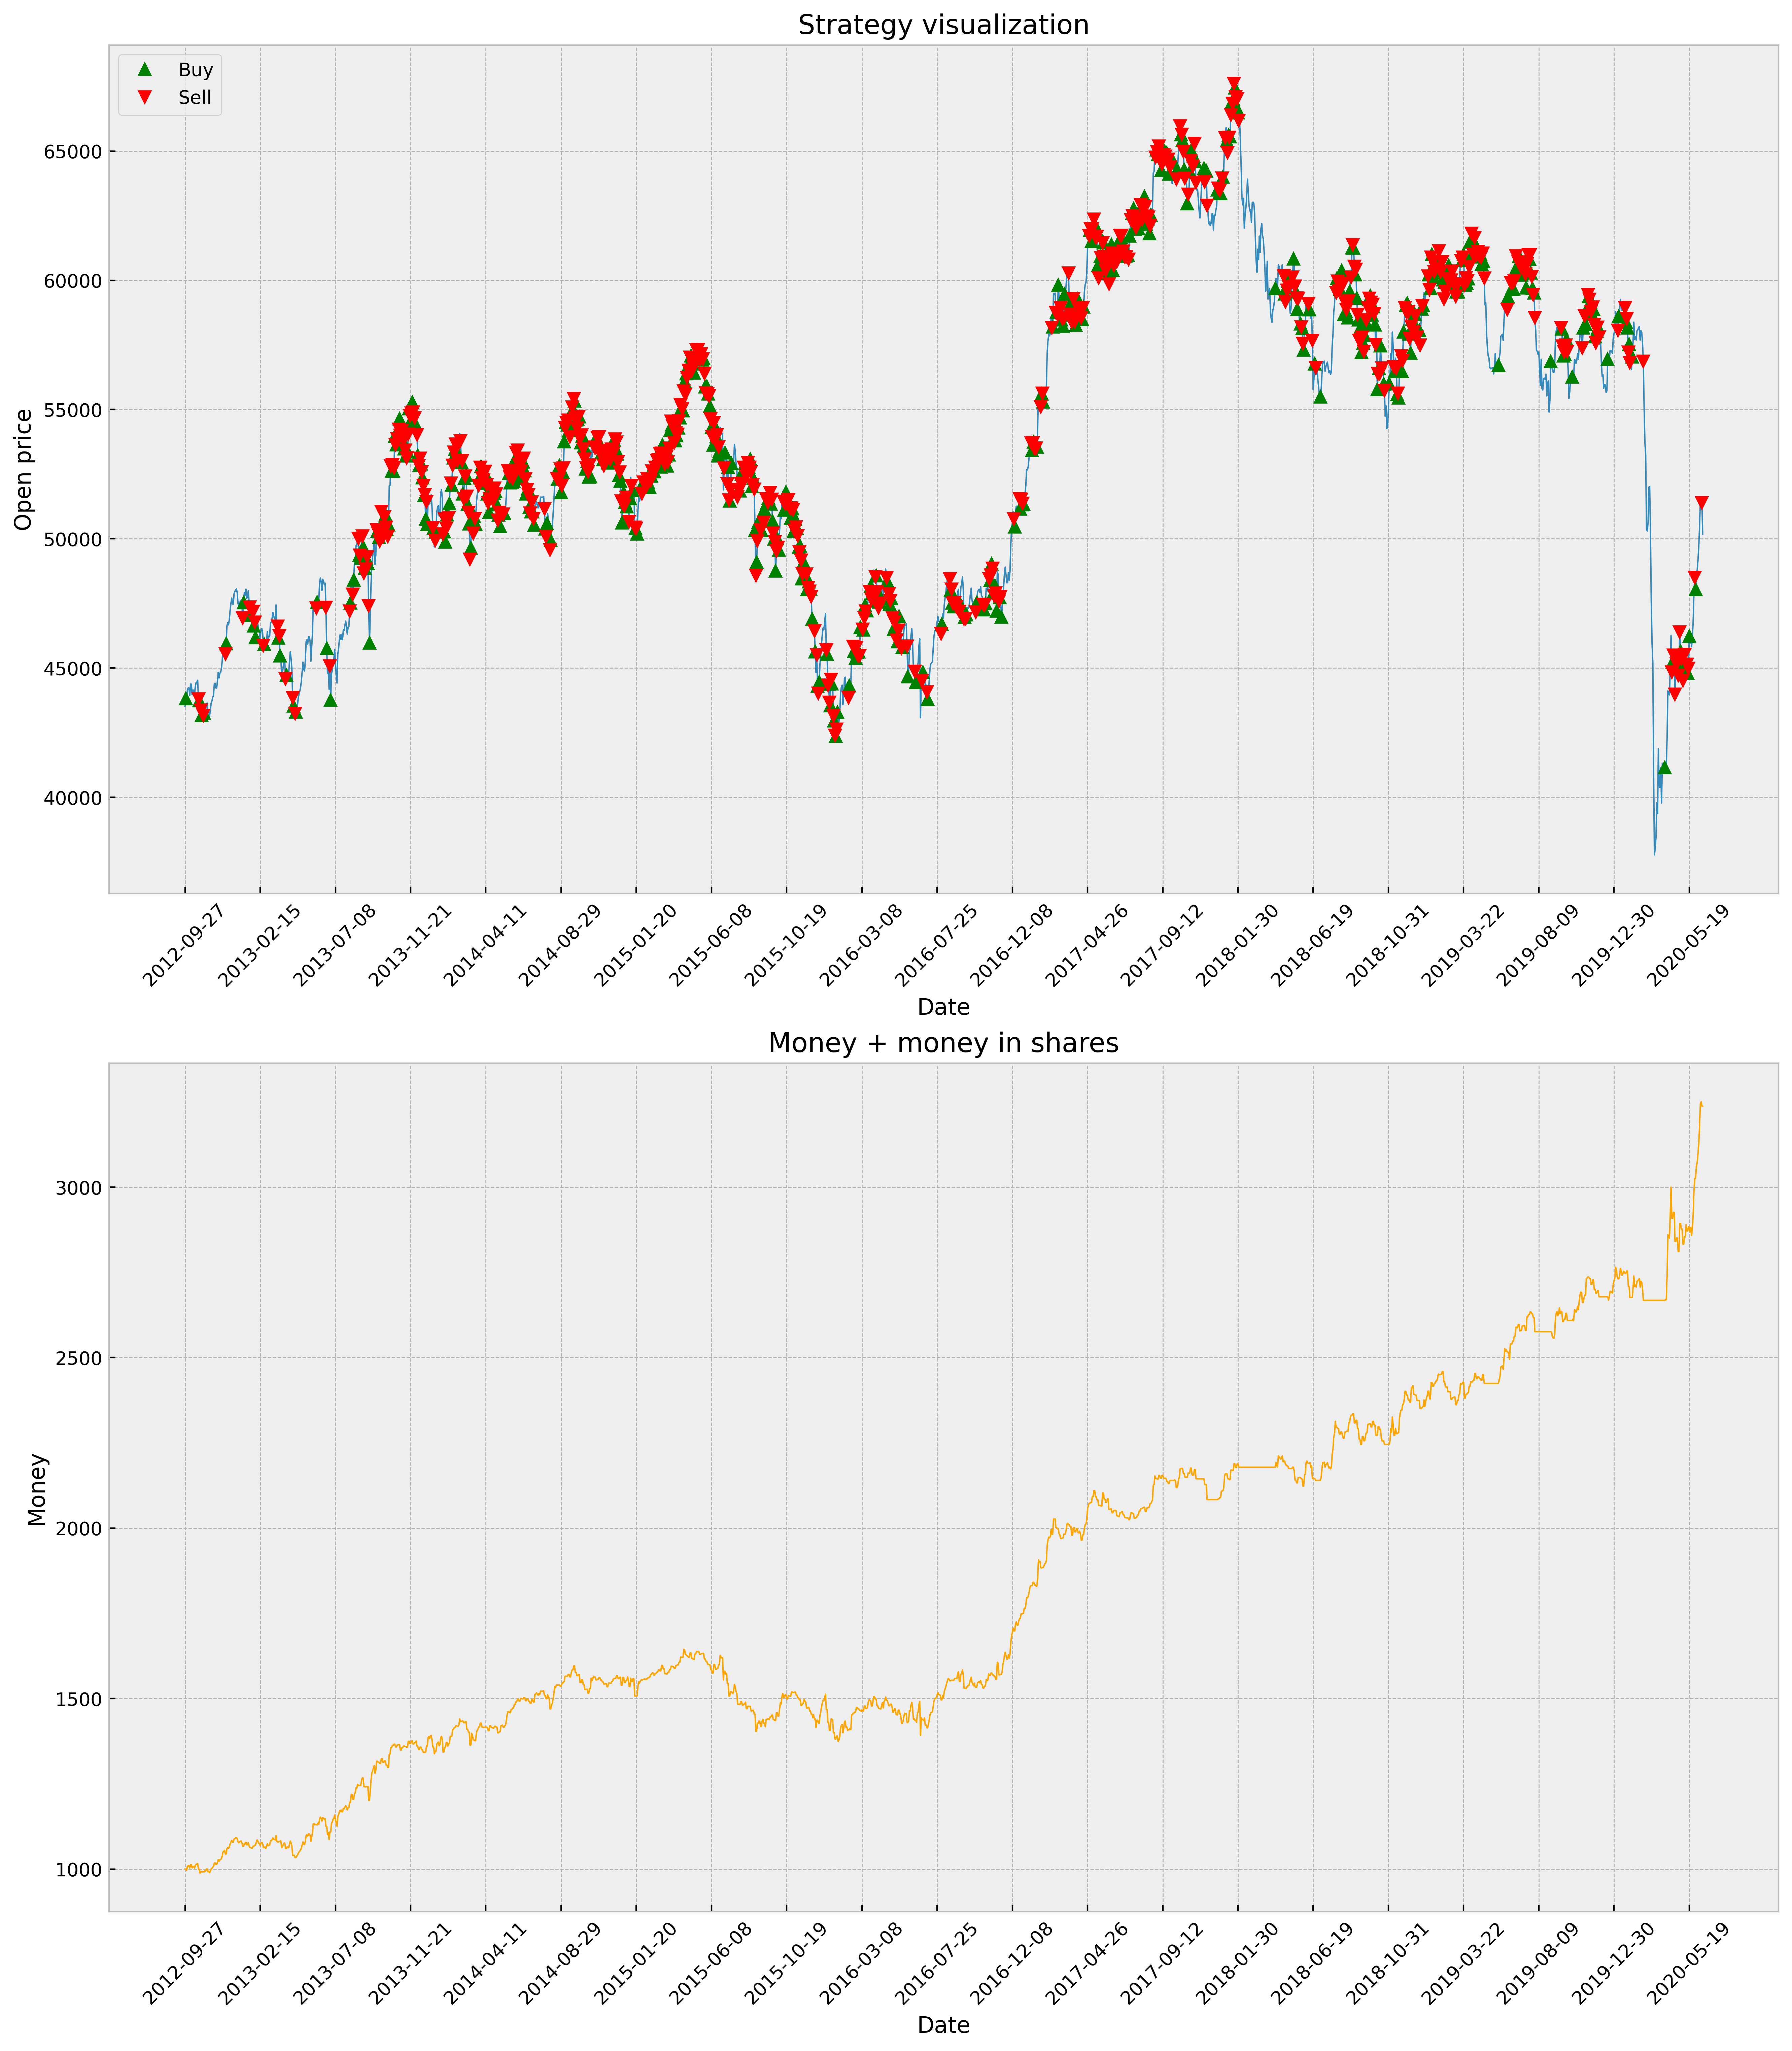

In [9]:
dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_strategy(
    stock_data,
    ta_features,
    best_strategy,
    INITIAL_MONEY,
    COMMISSION,
)
plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)
best_strategy_final_money = sum_money_and_money_in_shares[-1]

In [9]:
dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_best_possible_strategy(
    stock_data
)
plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)
best_possible_strategy_final_money = sum_money_and_money_in_shares[-1]

In [ ]:
print(f'{best_strategy_final_money / best_possible_strategy_final_money * 100}%')